In [0]:
import os; os.chdir('/content/drive/My Drive/Colab Notebooks/Lazy courses/CNN course/data')

In [0]:
from __future__ import print_function, division
from builtins import range

import numpy as np
import wave
import sys
import matplotlib.pyplot as plt

from scipy.io.wavfile import write

In [0]:
spf = wave.open('wav1.wav', 'r')

In [5]:
#extract raw audio from wav file
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
print("numpy signal:" , signal.shape)

numpy signal: (6980,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


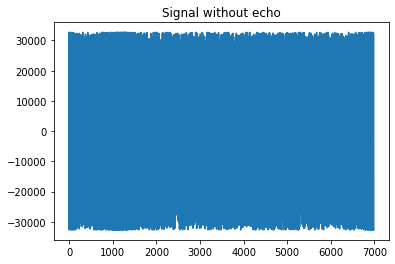

In [8]:
plt.plot(signal)
plt.title("Signal without echo")
plt.show()

In [10]:
delta = np.array([1, 0, 0])
noecho = np.convolve(signal, delta)
print("No echo signal", noecho.shape)
assert(np.abs(noecho[:len(signal)] - signal).sum() < 0.000001)

noecho = noecho.astype(np.int16)
write('noecho.wav', 16000, noecho)

No echo signal (6982,)


In [0]:
filt = np.zeros(16000)
filt[0] = 1
filt[4000] = 0.6
filt[8000] = 0.3
filt[12000] = 0.2
filt[15999] = 0.1
out = np.convolve(signal, filt)

out = out.astype(np.int16)
write('out.wav', 16000, out)

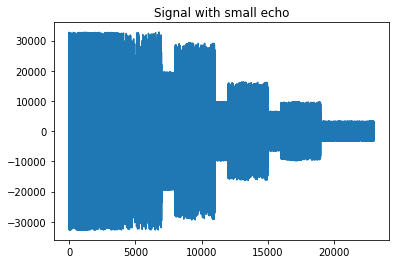

In [12]:
plt.plot(out)
plt.title('Signal with small echo')
plt.show()